In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#image below
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

In [115]:
df = pd.read_csv('/home/brunocampos01/projetos/data_science/analise_CEAPS/dados_limpos_ceaps.csv', 
                 encoding='latin1', parse_dates=['DATA'])

In [116]:
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2016,1,SENADOR 1,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,2016-01-13,Despesa com pagamento de energia elétrica para...,73.60
1,2016,1,SENADOR 1,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,2016-01-18,Pagamento de energia elétrica para o escritóri...,206.84
2,2016,1,SENADOR 1,Aluguel,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,2016-04-01,"Despesa com pagamento de aluguel, utilizado pa...",6000.00
3,2016,1,SENADOR 1,Aluguel,05.423.963/0001-11,OI MÓVEL S.A.,661639001,2016-01-16,despesa com pagamento de telefonia para o escr...,407.48
4,2016,1,SENADOR 1,Despesas gerais,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,2016-06-01,Aquisição de publicação virtual de conteúdo jo...,550.00


In [117]:
df.dtypes

ANO                           int64
MES                           int64
SENADOR                      object
TIPO_DESPESA                 object
CNPJ_CPF                     object
FORNECEDOR                   object
DOCUMENTO                    object
DATA                 datetime64[ns]
DETALHAMENTO                 object
VALOR_REEMBOLSADO           float64
dtype: object

In [118]:
df.describe()

,ANO,MES,VALOR_REEMBOLSADO
count,26691.0,26691.000000,26691.000000
mean,2016.0,6.470908,947.484513
std,0.0,3.257134,2733.820037
min,2016.0,1.000000,0.010000
25%,2016.0,4.000000,124.000000
50%,2016.0,6.000000,324.790000
75%,2016.0,9.000000,956.865000
max,2016.0,12.000000,256980.000000


In [119]:
df[df['VALOR_REEMBOLSADO'] <= 1]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
6847,2016,3,SENADOR 29,Passagens,07.575.651/0001-59,GOL,NFPJ4Z,2016-03-22,"Companhia Aérea: GOL, Localizador: NFPJ4Z. Pas...",0.01
6848,2016,3,SENADOR 29,Passagens,07.575.651/0001-59,GOL,OEI85P,2016-03-30,"Companhia Aérea: GOL, Localizador: OEI85P. Pas...",0.01
11278,2016,6,SENADOR 42,Passagens,33.937.681/0001-78,LATAM,3EY28M,2016-02-06,"Companhia Aérea: LATAM, Localizador: 3EY28M. P...",0.01
11494,2016,12,SENADOR 42,Passagens,07.575.651/0001-59,GOL TRANSPORTES AÉREOS S/A,NCNMYL,2016-10-17,"Companhia Aérea: GOL, Localizador: NCNMYL. Pas...",0.01
13507,2016,2,SENADOR 48,Despesas gerais,60.579.703/0001-48,Empresa Folha da Manhã,10484856-013c,2015-12-22,Senador José Serra - Despesa com assinatura do...,0.90
16661,2016,4,SENADOR 61,"Locomoção, hospedagem e alimentação",00.306.597/0070-29,Cascol Combustíveis para Veículos Ltda,1637,2016-01-06,NaN,0.37
17388,2016,3,SENADOR 62,"Locomoção, hospedagem e alimentação",07.045.078/0001-71,Posto Demari Ltda,605924,2016-01-03,Aquisição de combustível para veículos utiliza...,0.97
17963,2016,11,SENADOR 62,Aluguel,92.802.784/0001-90,Companhia Riograndense de Saneamento - Corsan,100002992396201611,2016-07-11,Despesa com água - escritório político.,0.49
18749,2016,6,SENADOR 64,Passagens,12.281.922/0001-01,Via Berrini Turismo e Eventos Ltda ME,FT00020270,2016-07-21,"Companhia Aérea: AZUL, Localizador: PYZD4M. Pa...",0.01
23127,2016,2,SENADOR 82,Passagens,02.012.862/0001-60,TAM,2IZ9JY,2016-02-03,"Companhia Aérea: TAM, Localizador: 2IZ9JY. Pas...",0.30


In [120]:
senador29 = df[df['SENADOR'] == 'SENADOR 29']
senador29.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
6756,2016,1,SENADOR 29,Aluguel,409.134.304-04,ALDECI JOSÉ DE MEDEIROS CABO,01/16,2016-02-15,Referente pagamento de sala destinada ao escri...,1800.00
6757,2016,1,SENADOR 29,Aluguel,10.835.932/0001-08,COMPAINHA ENERGÉTICA DE PERNAMBUCO,406028,2016-05-01,Consumo de energia elétrica do escritório parl...,206.33
6758,2016,1,SENADOR 29,Aluguel,124.147.944-53,JOSÉ CARLOS FONTAINE COSTA,01/16,2016-01-15,Referente pagamento de sala destinada ao escri...,2160.00
6759,2016,1,SENADOR 29,Aluguel,20.755.190/0001-64,SUBCONDOMINIO COMPLEXO EMPRESARIAL RM TRADE CE...,a0911/927,2015-12-16,Referente Taxa de condomínio do escritório par...,403.42
6760,2016,1,SENADOR 29,Aluguel,20.755.190/0001-64,SUBCONDOMINIO COMPLEXO EMPRESARIAL RM TRADE CE...,a0912-927,2015-12-16,Referente Taxa de condomínio do escritório par...,486.06


In [121]:
senador29.shape

(601, 10)

#Visualização das despesas do senador 29


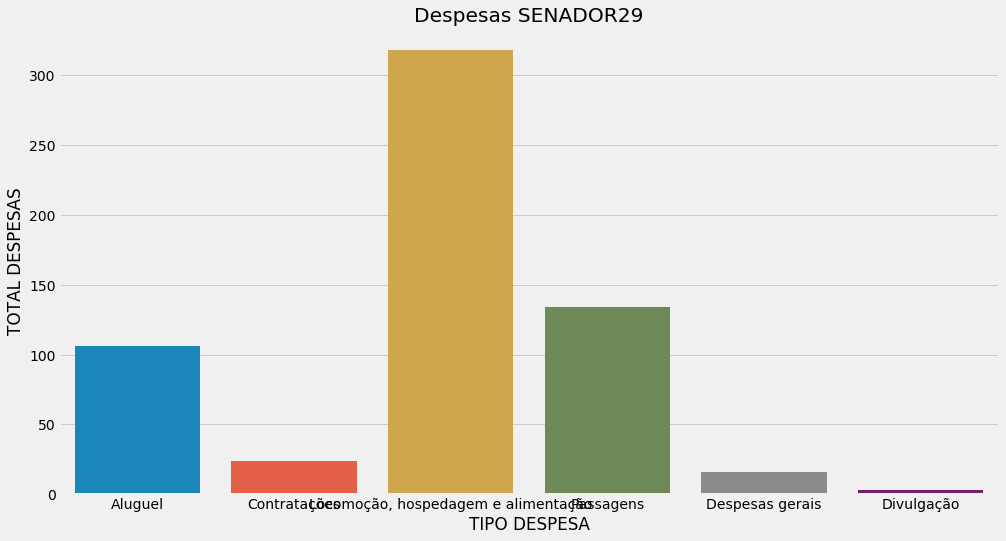

In [122]:
sns.countplot(data=senador29, x='TIPO_DESPESA')
plt.title('Despesas SENADOR29')
plt.xlabel('TIPO DESPESA')
plt.ylabel('TOTAL DESPESAS')
plt.show()

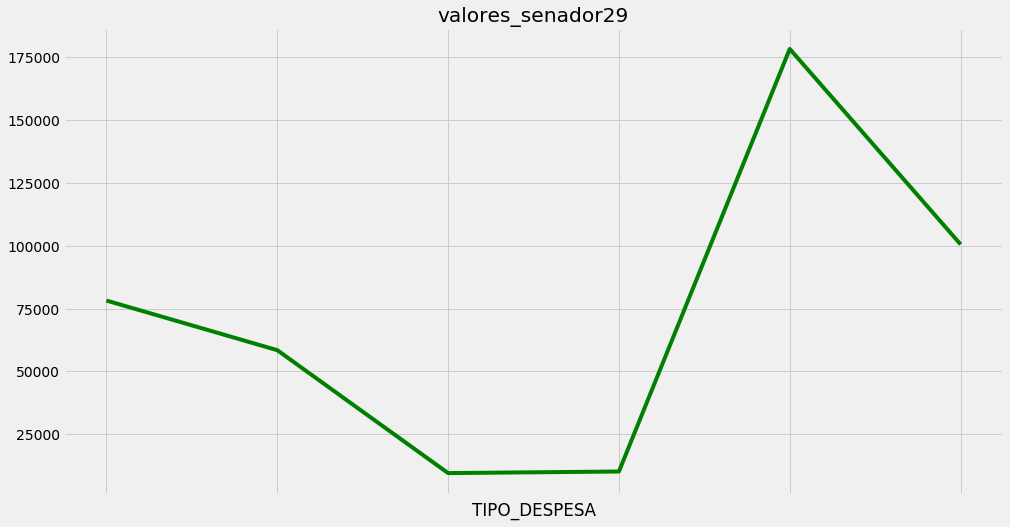

In [123]:
valores_senador29 = senador29.groupby('TIPO_DESPESA')['VALOR_REEMBOLSADO'].sum()
valores_senador29.plot(kind='line',rot=0, color='green', title='valores_senador29')
plt.show()

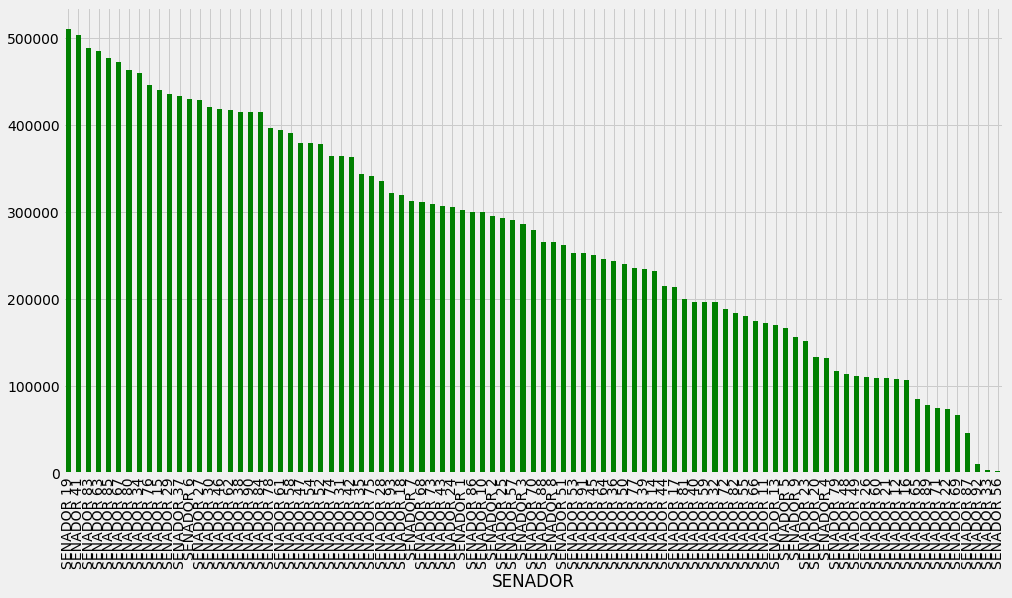

In [124]:
valores_senadores = df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)
valores_senadores.plot(kind='bar', color='green')

In [125]:
df['DATA'].dropna(inplace=True)

In [126]:
df['DATA'] = df['DATA'].apply(lambda x: x.strftime('%Y-%m'))

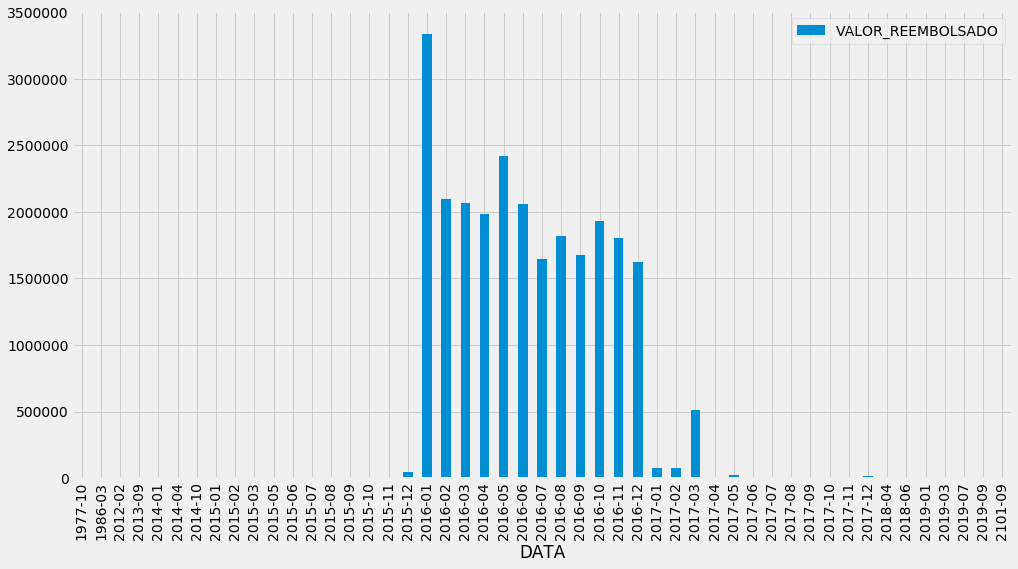

In [128]:
gastos_por_mes = df.pivot_table(index='DATA', values='VALOR_REEMBOLSADO', aggfunc=np.sum)
gastos_por_mes.plot(kind='bar')

In [133]:
media = df.pivot_table(index='DATA', values='VALOR_REEMBOLSADO', aggfunc=np.mean)
media.columns = ['MEDIA']
mediana = df.pivot_table(index='DATA', values='VALOR_REEMBOLSADO', aggfunc=np.median)
mediana.columns = ['MEDIANA']
media_e_mediana = pd.concat([media, mediana], axis=1)
media_e_mediana.head()

,MEDIA,MEDIANA
DATA,,
1977-10,152.51,152.51
1986-03,139.16,139.16
2012-02,162.40,162.40
2013-09,675.00,675.00
2014-01,374.83,374.83


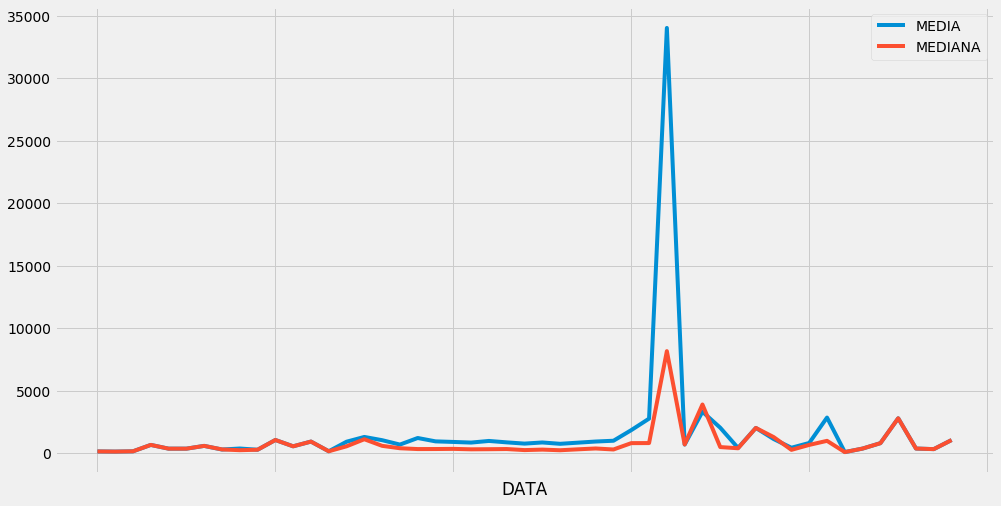

In [134]:
media_e_mediana.plot()
plt.show()

In [138]:
dados2016 = df[(df['DATA'] >= '2016-01') & (df['DATA'] <= '2016-12')]
dados2016.tail()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
26686,2016,12,SENADOR 93,"Locomoção, hospedagem e alimentação",01.245.727/0001-00,Trevo Posto de Serviços Ltda,083555,2016-12,NaN,183.40
26687,2016,12,SENADOR 93,"Locomoção, hospedagem e alimentação",01.245.727/0001-00,Trevo Posto de Serviços Ltda,084787,2016-12,NaN,50.00
26688,2016,12,SENADOR 93,Passagens,09.296.295/0001-60,Azul,QGIJ8X,2016-07,"Companhia Aérea: AZUL, Localizador: QGIJ8X. Pa...",1055.41
26689,2016,12,SENADOR 93,Passagens,21.443.582/0001-50,Pronto Produção de Eventos e Turismo Ltda,S6ZB6L,2016-12,"Companhia Aérea: AZUL, Localizador: S6ZB6L. Pa...",390.18
26690,2016,12,SENADOR 93,Passagens,21.443.582/0001-50,Pronto Produção de Eventos e Turismo Ltda,ZDS6KY,2016-12,"Companhia Aérea: GOL, Localizador: ZDS6KY. Pas...",654.28


In [140]:
mapa_calor = dados2016.pivot_table(index='DATA', values='VALOR_REEMBOLSADO', columns='TIPO_DESPESA', aggfunc=np.sum)
mapa_calor

TIPO_DESPESA,Aluguel,Contratações,Despesas gerais,Divulgação,"Locomoção, hospedagem e alimentação",Passagens,Segurança
DATA,,,,,,,
2016-01,681720.72,519205.27,130287.53,419496.30,879021.59,425766.63,284426.09
2016-02,355621.91,286143.29,103718.82,252818.74,592270.58,487826.19,21832.40
2016-03,361367.60,255112.80,94986.41,291705.97,440847.14,586842.49,33859.82
2016-04,392789.93,243225.69,93684.00,224044.85,462819.68,549032.37,21978.24
2016-05,765999.20,275629.88,80266.83,263856.45,476910.51,520546.83,39480.96
2016-06,371057.80,219292.74,90153.46,320627.83,423650.18,624275.09,13873.95
2016-07,306088.26,136238.66,67689.75,200566.67,475541.95,453256.15,7124.31
2016-08,252439.17,202764.55,78291.64,256752.60,420363.64,578393.33,34069.32
2016-09,334052.65,107722.85,78875.75,200740.90,473085.66,469299.83,9194.48


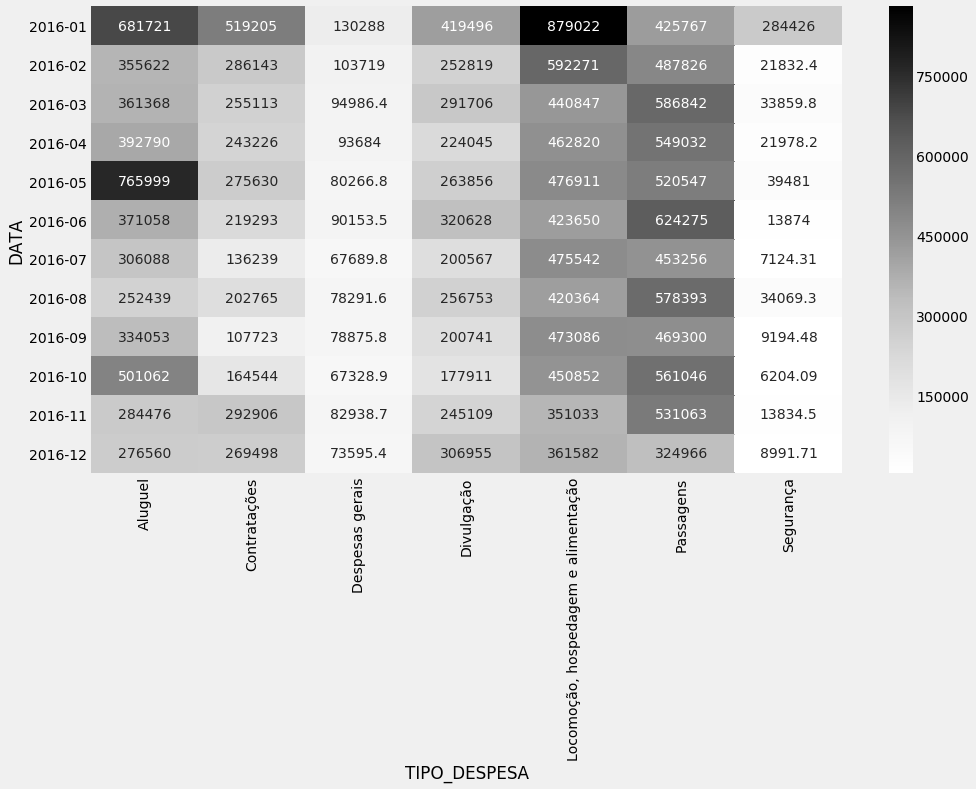

In [146]:
sns.heatmap(mapa_calor, annot=True, fmt='g',cmap='Greys')